<a href="https://colab.research.google.com/github/Guilherme20050/portfolio-automacao-industrial/blob/main/Projeto1_manutencao_preditiva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Tudo carregado com sucesso!
Dataset gerado e salvo como dataset_simulado.csv


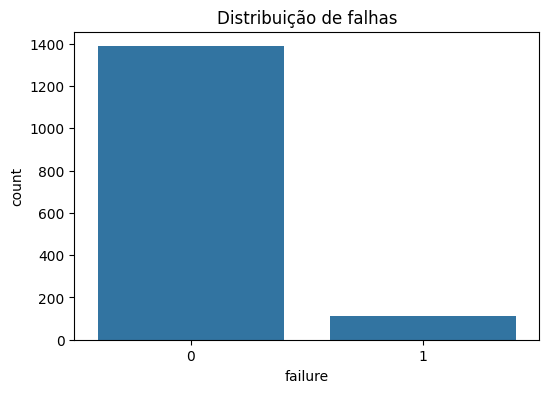

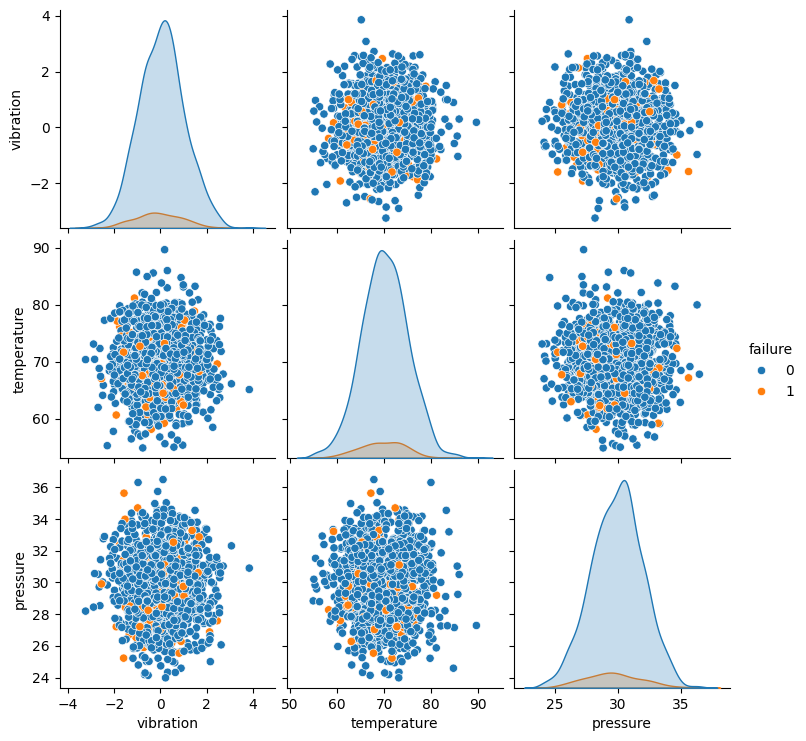

Treino/Teste criado com sucesso!

🧪 RELATÓRIO COMPLETO:
              precision    recall  f1-score   support

           0       0.91      1.00      0.95       342
           1       0.50      0.03      0.06        33

    accuracy                           0.91       375
   macro avg       0.71      0.51      0.51       375
weighted avg       0.88      0.91      0.87       375


🎯 Acurácia: 0.912


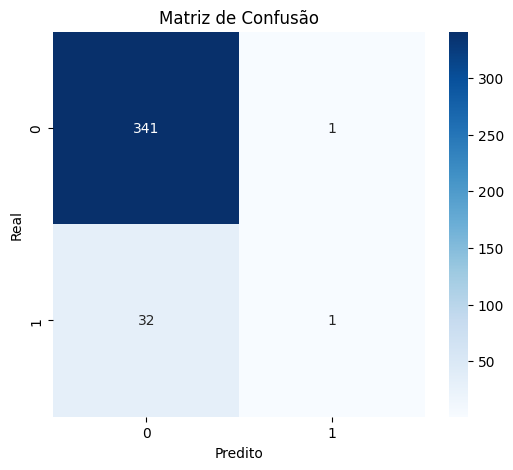

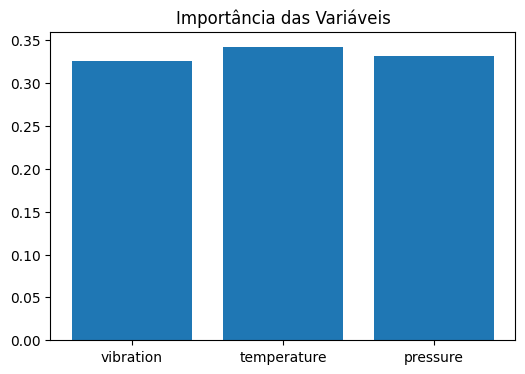


🔮 Previsão para novo dado: 0

💾 Modelo salvo como modelo_manutencao_predictivo.joblib

🚀 PROJETO FINALIZADO!


In [1]:
# ===============================================
# 🏭 PROJETO 1 — MANUTENÇÃO PREDITIVA INDUSTRIAL
# Machine Learning | Random Forest | Indústria 4.0
# ===============================================

# ================================
# 1️⃣ IMPORTAÇÃO DAS BIBLIOTECAS
# ================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score
)

print("Tudo carregado com sucesso!")

# ================================
# 2️⃣ CRIAÇÃO DO DATASET SIMULADO
# ================================
np.random.seed(42)

data = pd.DataFrame({
    'vibration': np.random.normal(0, 1, 1500),
    'temperature': np.random.normal(70, 5, 1500),
    'pressure': np.random.normal(30, 2, 1500),
    'failure': np.random.choice([0,1], size=1500, p=[0.93, 0.07])
})

data.head()

# Salvar dataset para uso externo
data.to_csv("dataset_simulado.csv", index=False)

print("Dataset gerado e salvo como dataset_simulado.csv")

# ================================
# 3️⃣ ANÁLISE EXPLORATÓRIA
# ================================
plt.figure(figsize=(6,4))
sns.countplot(x=data["failure"])
plt.title("Distribuição de falhas")
plt.show()

sns.pairplot(data, hue="failure")
plt.show()

# ================================
# 4️⃣ TREINO/TESTE
# ================================
X = data.drop("failure", axis=1)
y = data["failure"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

print("Treino/Teste criado com sucesso!")

# ================================
# 5️⃣ MODELO RANDOM FOREST PROFISSIONAL
# ================================
model = RandomForestClassifier(
    n_estimators=200,
    max_depth=8,
    class_weight="balanced",
    random_state=42
)

model.fit(X_train, y_train)

# ================================
# 6️⃣ AVALIAÇÃO DO MODELO
# ================================
y_pred = model.predict(X_test)

print("\n🧪 RELATÓRIO COMPLETO:")
print(classification_report(y_test, y_pred))

print("\n🎯 Acurácia:", accuracy_score(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusão")
plt.xlabel("Predito")
plt.ylabel("Real")
plt.show()

# ================================
# 7️⃣ IMPORTÂNCIA DAS FEATURES
# ================================
importances = model.feature_importances_
plt.figure(figsize=(6,4))
plt.bar(X.columns, importances)
plt.title("Importância das Variáveis")
plt.show()

# ================================
# 8️⃣ PREDIÇÃO EM NOVOS DADOS
# ================================
novo = pd.DataFrame({
    "vibration":[0.8],
    "temperature":[75],
    "pressure":[28]
})

print("\n🔮 Previsão para novo dado:", model.predict(novo)[0])

# ================================
# 9️⃣ SALVAR MODELO EM FORMATO PROFISSIONAL
# ================================
import joblib
joblib.dump(model, "modelo_manutencao_predictivo.joblib")

print("\n💾 Modelo salvo como modelo_manutencao_predictivo.joblib")
print("\n🚀 PROJETO FINALIZADO!")
